In [1]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt

In [2]:
input_path = "C:/Users/Lindsey/Desktop/Daily-Bruin/the-stack/datasets/student-demographics-hsis/"

In [7]:
df = pd.read_csv(input_path + "TotalGrantMoney.csv", encoding="ISO-8859-1",  index_col=0)

In [8]:
def DollarAwards(Input):
    df_sorted = df[df["Campus"] == Input ]
    return df_sorted["Dollar Amount of Awards"]

In [9]:
Campuses = ["Berekeley", "Davis", "Irvine", "Los Angeles", "Merced","Riverside","San Diego","Santa Cruz", "Santa Barbara"]
d={}
for campus in Campuses:
    d[campus] = DollarAwards(campus)
DollarsBerkeley = DollarAwards("Berkeley")
DollarsSanBar = DollarAwards("Santa Barbara")

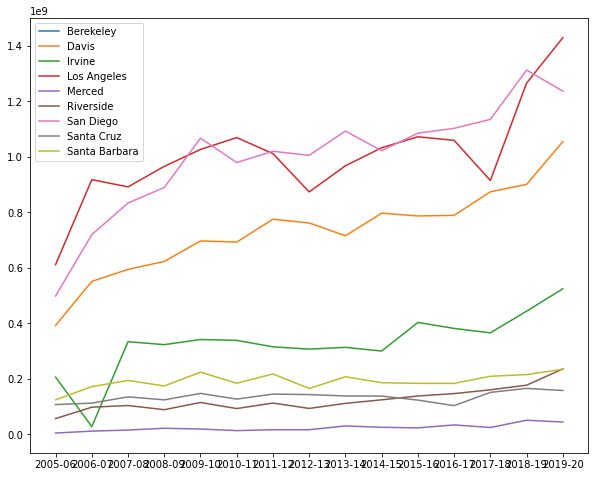

In [10]:
plt.figure(figsize=(10, 8))
for item in d.keys():
    plt.plot(d[item], label = item)
plt.legend()

Series([], Name: Dollar Amount of Awards, dtype: int64)